In [ ]:
#An example of how to use the Materials Project API with an API key for 3 materials.
from mp_api.client import MPRester

# Option 1: Pass your API key directly as an argument.
with MPRester("wPjLcbtxrHCBpdho9KRPeMsneJHX25kH") as mpr:
       docs = mpr.materials.summary.search(
        material_ids=["mp-149", "mp-13", "mp-22526"]
    )

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
#imported materials and their properties
for doc in docs:
    print(doc.material_id, doc.formula_pretty, doc.energy_above_hull, doc.band_gap,doc.density_atomic, doc.nelements)


mp-13 Fe 0.0 0.0 11.734084234678496 1
mp-149 Si 0.0 0.6105 20.164763423707026 1
mp-22526 LiCoO2 0.0 0.6623 7.933424216932258 3


In [ ]:
#importing materials containing Si or O with a band gap between 0.5 and 1.0 eV
with MPRester("wPjLcbtxrHCBpdho9KRPeMsneJHX25kH") as mpr:
    docs = mpr.materials.summary.search(
        elements=["Si", "O"], band_gap=(0.5, 1.0)
    )

Retrieving SummaryDoc documents:   0%|          | 0/443 [00:00<?, ?it/s]

In [ ]:
#displaying them
for doc in docs:
    print(doc.material_id, doc.formula_pretty, doc.energy_above_hull, doc.band_gap,doc.density_atomic, doc.nelements)

mp-34150 SiO2 0.346973946597223 0.921899999999999 20.320065317744454 2
mp-640917 SiO2 2.428085125000001 0.6553999999999991 14.614521025354037 2
mp-554498 SiO2 0.8909161480555571 0.5051 16.20341596557302 2
mp-667448 SiO2 0.243598421041667 0.9579000000000001 19.01987470649865 2
mp-13820 Cd3SiO5 0.0 0.9679000000000001 13.022245959614361 3
mp-1192103 FeSiO4 0.26989361111111304 0.6887 15.14073978915821 3
mp-1199561 FeSiO3 0.015693276416671002 0.7031000000000001 11.449739499460403 3
mp-725556 Pu2SiO10 0.0 0.7104 16.974698357349528 3
mp-675586 Fe2SiO4 0.16899429833333202 0.9435000000000001 10.640401389117454 3
mp-28195 SiAg2O3 0.043519272777777 0.6373000000000001 14.05005229794523 3
mp-1016821 BaSiO3 0.561268264999999 0.9473 11.297542946629182 3
mp-1016879 CdSiO3 0.374506266500001 0.6505999999999991 9.486956602700698 3
mp-1024036 Mg3SiO4 0.5118496181249991 0.8046999999999981 10.404924855914885 3
mp-978493 SiSnO3 0.489646943333336 0.7593999999999991 10.231298685662441 3
mp-754234 V2SiO4 0.0863

In [ ]:
#Main part, importing magnetic insulators with a band gap greater than 1 eV and with specific magnetic properties
#note: reduce num_chunks and chunk_size for faster results, but fewer materials will be returned
from mp_api.client import MPRester
import pandas as pd

magnetic_insulators = []

with MPRester("wPjLcbtxrHCBpdho9KRPeMsneJHX25kH") as mpr:
    docs = mpr.materials.summary.search(
        band_gap=(1.0, None),  # band gap greater than 1 eV
        fields=["material_id", "formula_pretty", "band_gap", "is_stable", "density_atomic", "nelements","elements","volume","nsites","composition","chemsys","density","symmetry","structure","efermi","total_magnetization_normalized_vol","num_magnetic_sites","num_unique_magnetic_sites","types_of_magnetic_species","theoretical"],
        deprecated=False,
        num_chunks=12,
        chunk_size=100
    )

    for doc in docs:
        try:
            mag_data = mpr.magnetism.get_data_by_id(doc.material_id)
            if (
                mag_data.ordering in ["FM", "AFM", "FiM","NM"] 
            ):
                magnetic_insulators.append({
                    "material_id": doc.material_id,
                    "formula": doc.formula_pretty,
                    "band_gap": doc.band_gap,
                    "ordering": mag_data.ordering,
                    "numberofelements": doc.nelements,
                    "density_atomic": doc.density_atomic,
                    "elements": doc.elements,
                    "volume": doc.volume,
                    "nsites": doc.nsites,
                    "composition": doc.composition,
                    "chemsys": doc.chemsys,
                    "density": doc.density,
                    "symmetry": doc.symmetry,
                    "structure": doc.structure,
                    "efermi": doc.efermi,
                    "total_magnetization_normalized_vol": mag_data.total_magnetization_normalized_vol,
                    "num_magnetic_sites": mag_data.num_magnetic_sites,
                    "num_unique_magnetic_sites": mag_data.num_unique_magnetic_sites,
                    "types_of_magnetic_species": mag_data.types_of_magnetic_species,
                    "theoretical": doc.theoretical})
        except:
            continue  # skip materials with missing magnetism data

# Save to CSV
df = pd.DataFrame(magnetic_insulators)
df.to_csv("magnetic_insulators.csv", index=False)
print("Saved to magnetic_insulators.csv")


Retrieving SummaryDoc documents:   0%|          | 0/1200 [00:00<?, ?it/s]

/tmp/ipykernel_8802/2950624825.py:17: DeprecationWarning: Accessing magnetism data through MPRester.magnetism is deprecated. Please use MPRester.materials.magnetism instead.
  mag_data = mpr.magnetism.get_data_by_id(doc.material_id)
/tmp/ipykernel_8802/2950624825.py:17: DeprecationWarning: get_data_by_id is deprecated and will be removed soon. Please use the search method instead.
  mag_data = mpr.magnetism.get_data_by_id(doc.material_id)


Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MagnetismDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

/home/ahmedfahmy177/anaconda3/lib/python3.11/site-packages/pymatgen/core/composition.py:372: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  syms = sorted(sym_amt, key=lambda sym: get_el_sp(sym).X)
/home/ahmedfahmy177/anaconda3/lib/python3.11/site-packages/pymatgen/core/composition.py:1365: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  syms: list[str] = sorted(sym_amt, key=lambda x: [get_el_sp(x).X, x])


Saved to magnetic_insulators.csv


In [ ]:
#Trying to get oxidation states and valence electrons for the materials
from pymatgen.core import Composition, Element
import pandas as pd

sample_data = [
    {"formula": "Fe2O3"},
    {"formula": "MnO2"},
    {"formula": "NiO"},
    {"formula": "MnTe2"}
]

results = []

for entry in sample_data:
    comp = Composition(entry["formula"])
    
    # Get oxidation state guess
    oxi_guess = comp.oxi_state_guesses()
    oxidation_states = oxi_guess[0] if oxi_guess else {}

    # Estimate valence electrons from outermost shell in full_electronic_structure
    valence_dict = {}
    for el in comp.elements:
        es = Element(el.symbol).full_electronic_structure
        # valence = electrons in the highest principal quantum number shell
        max_n = max(sub[0] for sub in es)
        valence_e = sum(sub[2] for sub in es if sub[0] == max_n)
        valence_dict[el.symbol] = valence_e

    results.append({
        "formula": entry["formula"],
        "oxidation_states": oxidation_states,
        "valence_electrons": valence_dict
    })

df = pd.DataFrame(results)
print(df)


  formula         oxidation_states   valence_electrons
0   Fe2O3   {'Fe': 3.0, 'O': -2.0}   {'Fe': 2, 'O': 6}
1    MnO2   {'Mn': 4.0, 'O': -2.0}   {'Mn': 2, 'O': 6}
2     NiO   {'Ni': 2.0, 'O': -2.0}   {'Ni': 2, 'O': 6}
3   MnTe2  {'Mn': 4.0, 'Te': -2.0}  {'Mn': 2, 'Te': 6}


In [4]:
import pandas as pd

df = pd.read_csv("magnetic_insulators.csv")


In [7]:
#visualizing the data
print("Data Overview:")
df.head()         # First 5 rows
df.tail()         # Last 5 rows
df.sample(8)      # Random 5 rows


Data Overview:


,material_id,formula,band_gap,ordering,numberofelements,density_atomic,elements,volume,nsites,composition,chemsys,density,symmetry,structure,efermi,total_magnetization_normalized_vol,num_magnetic_sites,num_unique_magnetic_sites,types_of_magnetic_species,theoretical
468,mp-8196,AgNO3,1.7204,NM,3,13.388611,"[Element Ag, Element N, Element O]",66.943057,5,Ag1 N1 O3,Ag-N-O,4.213744,crystal_system=<CrystalSystem.trig: 'Trigonal'...,Full Formula (Ag1 N1 O3)\nReduced Formula: AgN...,0.441746,0.000000e+00,0,0,[],False
186,mp-1101933,AgClO4,2.8481,NM,3,14.222063,"[Element Ag, Element Cl, Element O]",170.664758,12,Ag2 Cl2 O8,Ag-Cl-O,4.034353,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Ag2 Cl2 O8)\nReduced Formula: Ag...,0.203070,1.844552e-05,0,0,[],True
63,mp-2018369,Ag2S,1.5694,NM,2,20.463128,"[Element Ag, Element S]",245.557534,12,Ag8 S4,Ag-S,6.702851,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Ag8 S4)\nReduced Formula: Ag2S\n...,4.967744,0.000000e+00,0,0,[],False
1171,mp-1229056,As3P3Pb10(ClO12)2,3.1225,NM,5,16.351871,"[Element As, Element Cl, Element O, Element P,...",686.778576,42,As3 P3 Pb10 Cl2 O24,As-Cl-O-P-Pb,6.877810,crystal_system=<CrystalSystem.hex_: 'Hexagonal...,Full Formula (As3 P3 Pb10 Cl2 O24)\nReduced Fo...,6.449865,4.053126e-06,0,0,[],True
1059,mp-683949,AlP3(NCl3)3,3.7338,NM,4,25.548927,"[Element Al, Element Cl, Element N, Element P]",1635.131338,64,Al4 P12 N12 Cl36,Al-Cl-N-P,1.953896,crystal_system=<CrystalSystem.ortho: 'Orthorho...,Full Formula (Al4 P12 N12 Cl36)\nReduced Formu...,0.577155,1.808417e-07,0,0,[],False
340,mp-1199432,Al2FeP2(HO)18,4.0407,FM,5,8.418969,"[Element Al, Element Fe, Element H, Element O,...",345.177734,41,Al2 Fe1 P2 H18 O18,Al-Fe-H-O-P,2.298964,crystal_system=<CrystalSystem.tri: 'Triclinic'...,Full Formula (Al2 Fe1 P2 H18 O18)\nReduced For...,1.118297,1.158816e-02,1,1,['Fe'],False
613,mp-1245173,Al2O3,3.8149,NM,2,11.113827,"[Element Al, Element O]",1111.382713,100,Al40 O60,Al-O,3.046848,crystal_system=<CrystalSystem.tri: 'Triclinic'...,Full Formula (Al40 O60)\nReduced Formula: Al2O...,7.757525,2.785179e-06,0,0,[],True
1067,mp-1019510,AlPO4,5.4907,NM,3,19.151279,"[Element Al, Element O, Element P]",1838.522746,96,Al16 P16 O64,Al-O-P,1.762350,crystal_system=<CrystalSystem.ortho: 'Orthorho...,Full Formula (Al16 P16 O64)\nReduced Formula: ...,-1.888428,1.147661e-07,0,0,[],False


In [ ]:
# Show only FM
df[df["ordering"] == "FM"]

,material_id,formula,band_gap,ordering,numberofelements,density_atomic,elements,volume,nsites,composition,chemsys,density,symmetry,structure,efermi,total_magnetization_normalized_vol,num_magnetic_sites,num_unique_magnetic_sites,types_of_magnetic_species,theoretical
8,mp-866101,AcCrO3,2.0031,FM,3,12.272569,"[Element Ac, Element Cr, Element O]",61.362845,5,Ac1 Cr1 O3,Ac-Cr-O,8.848788,crystal_system=<CrystalSystem.cubic: 'Cubic'> ...,Full Formula (Ac1 Cr1 O3)\nReduced Formula: Ac...,6.364737,0.048890,1,1,['Cr'],True
96,mp-1198516,Ag3CN(ClO5)2,1.3566,FM,5,16.287175,"[Element Ag, Element C, Element Cl, Element N,...",553.763956,34,Ag6 C2 N2 Cl4 O20,Ag-C-Cl-N-O,3.481554,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Ag6 C2 N2 Cl4 O20)\nReduced Form...,0.651418,0.007279,4,10,['O'],False
217,mp-1293197,Al(FeO2)2,1.0647,FM,3,10.558880,"[Element Al, Element Fe, Element O]",147.824319,14,Al2 Fe4 O8,Al-Fe-O,4.553243,crystal_system=<CrystalSystem.ortho: 'Orthorho...,Full Formula (Al2 Fe4 O8)\nReduced Formula: Al...,4.425311,0.121765,4,4,['Fe'],True
218,mp-1048821,Al(FeO2)3,1.3123,FM,3,11.214441,"[Element Al, Element Fe, Element O]",448.577629,40,Al4 Fe12 O24,Al-Fe-O,4.301669,crystal_system=<CrystalSystem.trig: 'Trigonal'...,Full Formula (Al4 Fe12 O24)\nReduced Formula: ...,4.367549,0.133759,30,10,"['Fe', 'O']",True
267,mp-1047756,Al(WF5)3,3.1318,FM,3,16.043731,"[Element Al, Element F, Element W]",609.661765,38,Al2 W6 F30,Al-F-W,4.703717,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Al2 W6 F30)\nReduced Formula: Al...,1.928071,0.019682,6,2,['W'],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,mp-1228904,AlPH8(CCl)3,1.9662,FM,5,17.015690,"[Element Al, Element C, Element Cl, Element H,...",544.502076,32,Al2 P2 H16 C6 Cl6,Al-C-Cl-H-P,1.271153,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Al2 P2 H16 C6 Cl6)\nReduced Form...,0.580335,0.003666,2,3,['C'],True
1072,mp-1183022,AlPO4,1.9258,FM,3,20.684215,"[Element Al, Element O, Element P]",992.842321,48,Al8 P8 O32,Al-O-P,1.631740,crystal_system=<CrystalSystem.tri: 'Triclinic'...,Full Formula (Al8 P8 O32)\nReduced Formula: Al...,0.608785,0.002007,2,16,['O'],True
1111,mp-1214773,As(NF2)3,1.2946,FM,3,36.289615,"[Element As, Element F, Element N]",362.896147,10,As1 N3 F6,As-F-N,1.056698,crystal_system=<CrystalSystem.tri: 'Triclinic'...,Full Formula (As1 N3 F6)\nReduced Formula: As(...,-4.138462,0.022045,3,3,['N'],True
1121,mp-1229009,As2H5CO6,1.6590,FM,4,13.215676,"[Element As, Element C, Element H, Element O]",370.038926,28,As4 H10 C2 O12,As-C-H-O,2.359423,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (As4 H10 C2 O12)\nReduced Formula...,-1.710905,0.005402,2,1,['C'],True


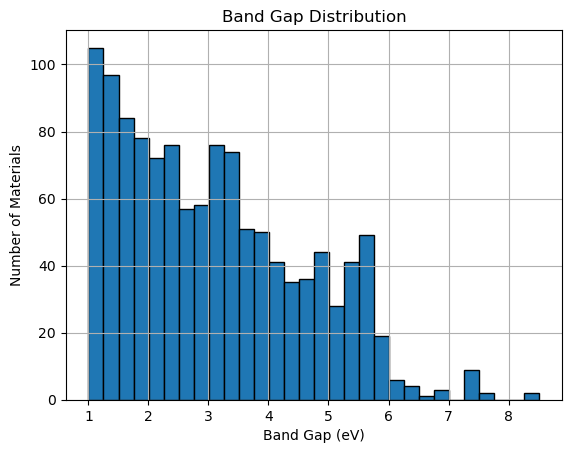

In [ ]:
#Band Gap Distribution across all materials
import matplotlib.pyplot as plt

df["band_gap"].hist(bins=30, edgecolor='black')
plt.xlabel("Band Gap (eV)")
plt.ylabel("Number of Materials")
plt.title("Band Gap Distribution")
plt.show()

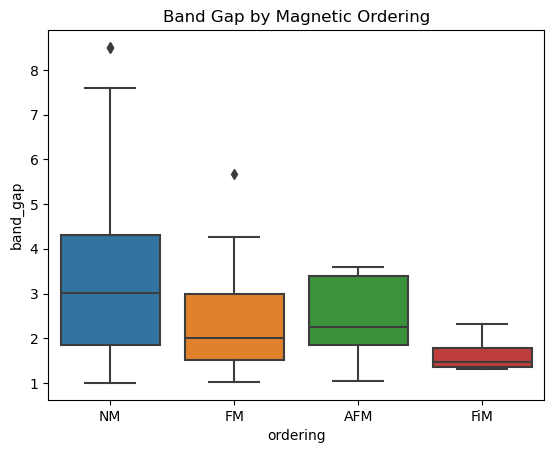

In [14]:
import seaborn as sns

sns.boxplot(data=df, x="ordering", y="band_gap")
plt.title("Band Gap by Magnetic Ordering")
plt.show()


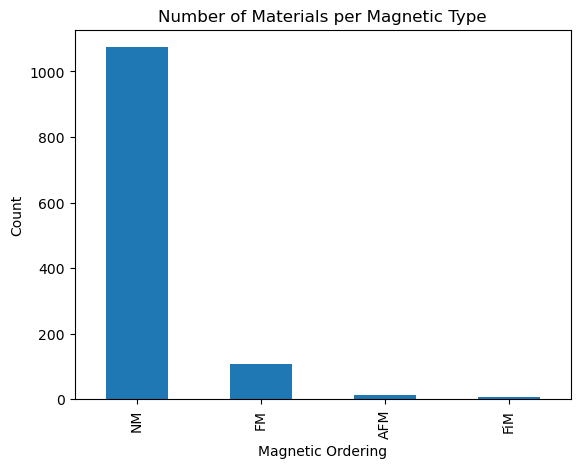

In [15]:
df["ordering"].value_counts().plot(kind="bar")
plt.xlabel("Magnetic Ordering")
plt.ylabel("Count")
plt.title("Number of Materials per Magnetic Type")
plt.show()


/home/ahmedfahmy177/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ahmedfahmy177/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ahmedfahmy177/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/ahmedfahmy177/anaconda3/lib/python3.11/site-packages/s

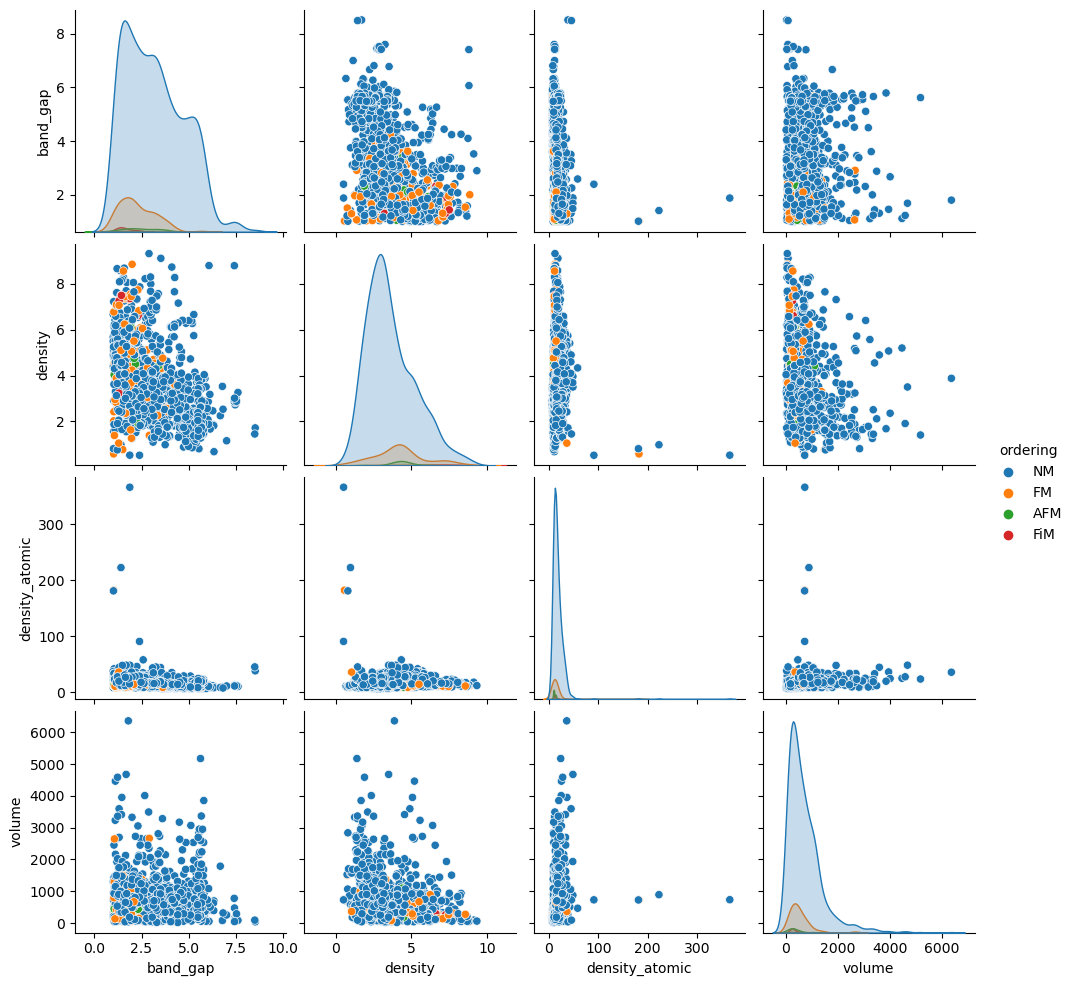

In [16]:
sns.pairplot(df[["band_gap", "density", "density_atomic", "volume", "ordering"]], hue="ordering")
